In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"breast_cancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.drop('Unnamed: 32',axis=1,inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
data.shape

(569, 32)

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#data.replace({'diagnosis': {'M': 0, 'B': 1}},inplace=True)

encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis']) 

In [9]:
data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [10]:
data.drop('id',axis=1,inplace=True)

In [11]:
X = data.drop('diagnosis',axis = 1)
Y = data.diagnosis

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test) #no fit_transform for x_test

## Building Neural Network

In [18]:
#imprting tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [32]:
#etting up layers 

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20,activation='relu'),
                          keras.layers.Dense(2,activation='sigmoid')
                            ])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
#compling the model
model.compile( optimizer ='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [34]:
# Training the model
history = model.fit(X_train_std, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8802 - loss: 0.3663 - val_accuracy: 0.9348 - val_loss: 0.2571
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9169 - loss: 0.2531 - val_accuracy: 0.9783 - val_loss: 0.1684
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9462 - loss: 0.1945 - val_accuracy: 0.9783 - val_loss: 0.1302
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9487 - loss: 0.1603 - val_accuracy: 0.9783 - val_loss: 0.1107
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9560 - loss: 0.1378 - val_accuracy: 0.9565 - val_loss: 0.1000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9633 - loss: 0.1218 - val_accuracy: 0.9565 - val_loss: 0.0933
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9731 - loss: 0.1096 - val_accuracy: 0.9565 - val_loss: 0.0890
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9756 - loss: 0.1000 - val_accuracy: 0.9565 - v

In [35]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test_std, Y_test)
print("Test accuracy:", test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9737 - loss: 0.1326
Test accuracy: 0.9736841917037964


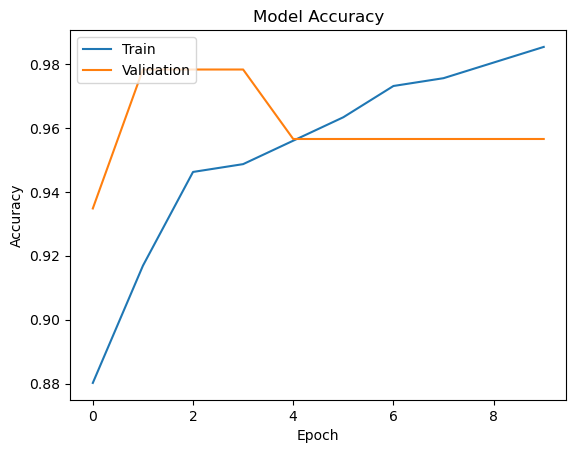

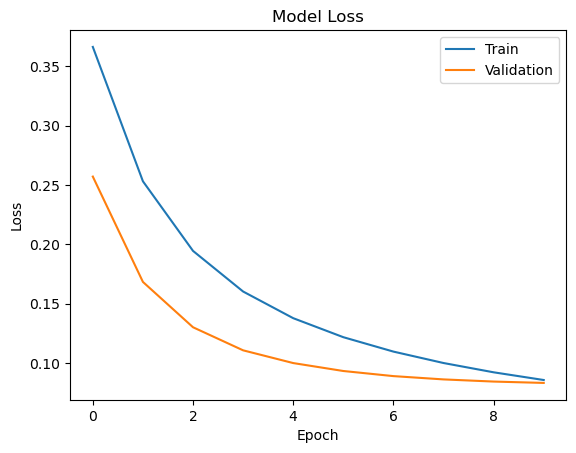

In [36]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [38]:
print(X_test_std[0])

[ 0.2904371   2.43355995  0.19973514  0.18386563 -0.95024967 -1.09629356
 -0.53035427 -0.54810481  0.14332708 -1.38724344  0.22843155  0.74399592
  0.08428874  0.1049746  -0.09852591 -0.63734179 -0.24743906 -0.4395458
  1.29193935 -0.76809409  0.21720929  1.81772012  0.09189648  0.09720572
 -0.78278973 -0.99092628 -0.57440293 -0.74271719  0.53184115 -1.23351931]


In [40]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step 


In [43]:
print(Y_pred[0])

[0.3620703 0.3986702]


In [44]:
print(X_test_std)

[[ 0.2904371   2.43355995  0.19973514 ... -0.74271719  0.53184115
  -1.23351931]
 [-0.03893246 -1.43419293 -0.05687332 ... -0.20414389 -1.22196549
  -0.65709122]
 [-0.51222822  0.05107996 -0.52879232 ... -0.10622147 -0.39164511
  -0.16914061]
 ...
 [ 1.31175953  0.6112533   1.28190115 ...  0.83985974  0.16244665
  -0.09496788]
 [-0.34615953  0.69493065 -0.25935343 ...  1.24510791  0.81624223
   2.08571043]
 [ 0.8467672  -0.68342118  0.97316909 ...  2.10833169  1.89337044
   1.11086882]]


In [45]:
print(Y_pred)

[[0.3620703  0.3986702 ]
 [0.63723993 0.21588998]
 [0.65774393 0.17100994]
 [0.6393159  0.11890204]
 [0.86095196 0.04920297]
 [0.78549135 0.1264795 ]
 [0.9162866  0.06012952]
 [0.15154573 0.90700895]
 [0.7928432  0.11736663]
 [0.92283297 0.00215523]
 [0.37675261 0.43020913]
 [0.74093485 0.072005  ]
 [0.62936354 0.20260075]
 [0.01805941 0.99048924]
 [0.00605958 0.98593456]
 [0.92768407 0.02430179]
 [0.91918695 0.01882275]
 [0.04491289 0.96271485]
 [0.84717846 0.07957629]
 [0.5994345  0.4993129 ]
 [0.00873189 0.98254937]
 [0.09538525 0.91256934]
 [0.85337174 0.07962565]
 [0.13386753 0.6360295 ]
 [0.6354604  0.04429689]
 [0.8560708  0.06321485]
 [0.7641073  0.19559564]
 [0.64443135 0.14210977]
 [0.7665576  0.04505301]
 [0.5486831  0.38476455]
 [0.9215354  0.03425872]
 [0.22754689 0.7929016 ]
 [0.36474597 0.43568632]
 [0.84243387 0.0347915 ]
 [0.2876075  0.78451455]
 [0.0022059  0.9980091 ]
 [0.9372191  0.00366044]
 [0.1173362  0.7826216 ]
 [0.7615278  0.11665233]
 [0.575496   0.3354756 ]


## model.predict() gives probabilities for class of each data points

In [47]:
# converting these probabilities to class labels using np.argmax function which gives index value of highest values

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]


## Building Predictive System

In [57]:
input_data= (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,
             2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

#converting this list to np array
inputs_asNumpy_array = np.asarray(input_data)

#reshaping np array as we are predicting for 1 instance
input_values_reshaped = inputs_asNumpy_array.reshape(1,-1)

input_values_std = scaler.transform(input_values_reshaped)

prediction = model.predict(input_values_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
    print("Benign")    
else:
    print("Malignant")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
[[0.7224109  0.16489547]]
[0]
Benign
